## ExtraTreesClassifier

In [58]:
# pipe_et = Pipeline([
#     ('et', ExtraTreesClassifier()),
#     ('sc', StandardScaler())
# ])
# params_et = {
#     'et__n_estimators': [100, 150, 200],
#     'et__max_depth'   : [None, 1, 2, 3, 4, 5]
# }

# gs_et = GridSearchCV(pipe_et, param_grid=params_et, cv=5)
# gs_et.fit(X_train, y_train)
# print(f'Gridsearch best score: {gs.best_score_}')
# print(f'Gridsearch best params:{gs.best_params_}')
# print(f'ExtraTrees training score{gs.score(X_train, y_train)}')
# print(f'ExtraTrees testing score{gs.score(X_test, y_test)}')

In [75]:
pipe_et = Pipeline([
    ('sc', StandardScaler()),
    ('et', ExtraTreesClassifier())
])

In [78]:
params_et = {
    'et__n_estimators': [50, 100, 150, 200, 300],
    'et__max_depth'   : [None, 1, 2, 3, 4, 5],
    'et__class_weight': ["balanced", "balanced_subsample"]
}

gs_et = GridSearchCV(pipe_et, param_grid=params_et, cv=5)
gs_et.fit(X_train, y_train)
print(f'Gridsearch best score: {gs_et.best_score_}')
print(f'Gridsearch best params:{gs_et.best_params_}')
print(f'ExtraTrees training score: {gs_et.score(X_train, y_train)}')
print(f'ExtraTrees testing score: {gs_et.score(X_test, y_test)}')

Gridsearch best score: 0.9272352674434652
Gridsearch best params:{'et__class_weight': 'balanced_subsample', 'et__max_depth': None, 'et__n_estimators': 300}
ExtraTrees training score: 0.998745294855709
ExtraTrees testing score: 0.9342105263157895


In [79]:
cross_val_score(gs_et, X_train_sc, y_train, cv=5).mean()

0.9259813489481674

In [83]:
et = ExtraTreesClassifier()
et.fit(X_train_sc, y_train)
print(f'ExtraTrees (Default params) training score{et.score(X_train_sc, y_train)}')
print(f'ExtraTrees (Default params) testing score{et.score(X_test_sc, y_test)}')

ExtraTrees (Default params) training score0.998745294855709
ExtraTrees (Default params) testing score0.9379699248120301


In [113]:
preds = gs_et.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96       414
         2.0       0.86      0.65      0.74        74
         3.0       1.00      0.91      0.95        44

    accuracy                           0.93       532
   macro avg       0.93      0.85      0.88       532
weighted avg       0.93      0.93      0.93       532

[[409   5   0]
 [ 26  48   0]
 [  1   3  40]]


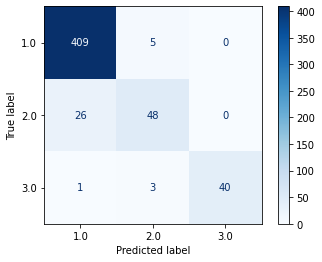

In [114]:
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm, display_labels=gs_et.classes_).plot(cmap='Blues');

In [104]:
et.feature_importances_

array([0.04362031, 0.05587694, 0.02766537, 0.04550963, 0.01406775,
       0.00164677, 0.0560726 , 0.11998277, 0.0711467 , 0.13262743,
       0.035548  , 0.04331428, 0.04328951, 0.02986395, 0.02570827,
       0.01097088, 0.05974079, 0.07100387, 0.05466935, 0.03470079,
       0.02297403])

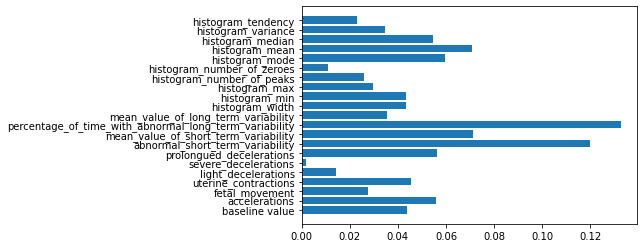

In [107]:
features = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
plt.barh(features, et.feature_importances_);

In [110]:
[['baseline value', 'accelerations', 'fetal_movement']]

[['baseline value', 'accelerations', 'fetal_movement']]

In [1]:
# Chase gradient booster as final classifier.